<a href="https://colab.research.google.com/github/vitor-freitas1/challenge-telecom-x-churn-part2/blob/main/challenge_telecom_x_churn_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Preparação dos dados

## 1.1 Importação das bibliotecas e upload dos dados tratados.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# URL do arquivo CSV "Raw" do GitHub
url_dados = 'https://raw.githubusercontent.com/zapjai/Desafio-Telecom2/refs/heads/main/Dlimp.csv'

# Carregando os dados diretamente da URL
try:
    df_limpo = pd.read_csv(url_dados)
    print("Arquivo 'Dlimp.csv' carregado com sucesso diretamente do GitHub!")
except Exception as e:
    print(f"Erro ao carregar os dados da URL: {e}")
    print("Verifique se a URL está correta e se o arquivo existe no repositório.")


# Visualização das primeiras linhas
if 'df_limpo' in locals():
    print("\nPrimeiras linhas do DataFrame:")
    display(df_limpo.head())

    print ("\nInformações gerais do DataFrame:")
    df_limpo.info()

Arquivo 'Dlimp.csv' carregado com sucesso diretamente do GitHub!

Primeiras linhas do DataFrame:


,Unnamed: 0,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40



Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   Churn             7043 non-null   object 
 3   gender            7043 non-null   object 
 4   SeniorCitizen     7043 non-null   int64  
 5   Partner           7043 non-null   object 
 6   Dependents        7043 non-null   object 
 7   tenure            7043 non-null   int64  
 8   PhoneService      7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  Streamin

## 1.2 Remoção de Colunas Irrelevantes

In [32]:
# Visualização de colunas atuais
print("Colunas antes da remoção:")
print(df_limpo.columns.tolist())
print(f"\nNúmero de colunas antes: {df_limpo.shape[1]}")

# Removendo a coluna de identificação de cliente
df_limpo = df_limpo.drop('customerID', axis=1)

# Confirmando a remoção
print("\n-------------------------------------------")
print("Coluna 'customerID' removida com sucesso!")
print("-------------------------------------------")

print("\nColunas após a remoção:")
print(df_limpo.columns.tolist())
print(f"\nNúmero de colunas agora: {df_limpo.shape[1]}")

Colunas antes da remoção:
['Unnamed: 0', 'customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Número de colunas antes: 22

-------------------------------------------
Coluna 'customerID' removida com sucesso!
-------------------------------------------

Colunas após a remoção:
['Unnamed: 0', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Número de colunas agora: 21


## 1.3 Encoding

In [38]:
# Criação de uma cópia do DataFrame, por garantia.
df_encoded = df_limpo.copy()

# identificando as colunas categóricas que ainda não são numéricas
colunas_categoricas = df_encoded.select_dtypes(include=['object']).columns.tolist()

print("Colunas categóricas a serem transformadas:", colunas_categoricas)
print(f"\nNúmero de colunas antes do encoding: {df_encoded.shape[1]}")

# Aplicando one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=colunas_categoricas, drop_first=True, dtype=int)

# Exibindo o resultado
print(f"\nNúmero de colunas após o encoding: {df_encoded.shape[1]}")
print("\nAs 5 primeiras linhas do DataFrame transformado:")
display(df_encoded.head())

print("\nTipos de dados após a transformação:")
df_encoded.info()

Colunas categóricas a serem transformadas: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Número de colunas antes do encoding: 21

Número de colunas após o encoding: 32

As 5 primeiras linhas do DataFrame transformado:


,Unnamed: 0,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,1,0,9,59.9,542.40,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,0,4,73.9,280.85,1,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,3,1,13,98.0,1237.85,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,4,1,3,83.9,267.40,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1



Tipos de dados após a transformação:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   Charges.Monthly                        7043 non-null   float64
 4   Charges.Total                          7043 non-null   float64
 5   Churn_Yes                              7043 non-null   int64  
 6   gender_Male                            7043 non-null   int64  
 7   Partner_Yes                            7043 non-null   int64  
 8   Dependents_Yes                         7043 non-null   int64  
 9   PhoneService_Yes                       7043 non-null   int64  
 10  MultipleLines_No phone service    

## 1.4 Verificação da Proporção de Evasão

Contagem de clientes por classe de Churn:
Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

Lembrete: 0 = Não Churn (Permaneceu), 1 = Churn (Evadiu)

Proporção de clientes por classe de Churn (em porcentagem):
Churn_Yes
0    73.46
1    26.54
Name: proportion, dtype: float64

--- Avaliação do Desequilíbrio ---
Há um desequilíbrio notável entre as classes. A classe majoritária (Não Churn) representa 73.5% do total.
Isso deve ser levado em conta na avaliação dos modelos.


C:\Users\jair.MSGAS\AppData\Local\Temp\ipykernel_34692\1105115319.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn_Yes', data=df_encoded, palette='pastel')


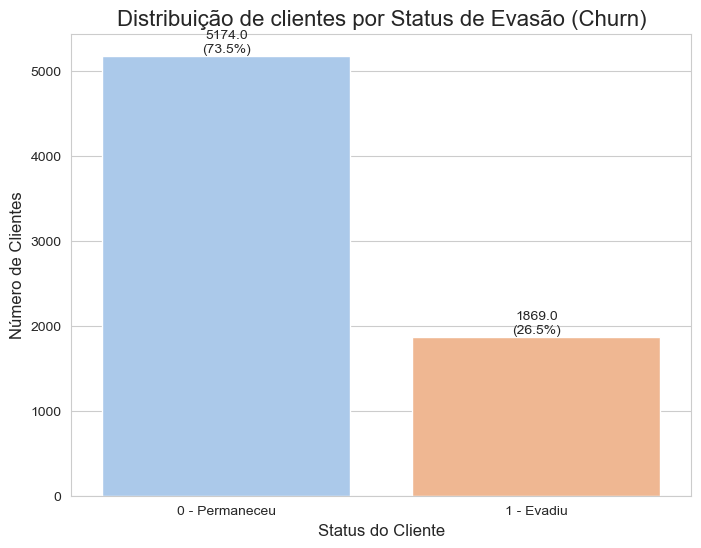

In [39]:
# Verificando a contagem de cada classe na coluna 'Churn_Yes'
contagem_churn = df_encoded['Churn_Yes'].value_counts()
print("Contagem de clientes por classe de Churn:")
print(contagem_churn)
print("\nLembrete: 0 = Não Churn (Permaneceu), 1 = Churn (Evadiu)")

# Calculando a proporção em porcentagem
proporcao_churn = df_encoded['Churn_Yes'].value_counts(normalize=True) * 100
print("\nProporção de clientes por classe de Churn (em porcentagem):")
print(proporcao_churn.round(2))

# Avaliação de desequilíbrio
print ("\n--- Avaliação do Desequilíbrio ---")
if abs(proporcao_churn[0] - proporcao_churn[1]) > 20:
    print("Há um desequilíbrio notável entre as classes. A classe majoritária (Não Churn) representa "
          f"{proporcao_churn[0]:.1f}% do total.")
    print("Isso deve ser levado em conta na avaliação dos modelos.")
else:
    print("O desequilíbrio entre as classes é moderado.")

# Visualização da proporção com um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn_Yes', data=df_encoded, palette='pastel')
plt.title('Distribuição de clientes por Status de Evasão (Churn_Yes)', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])

# Adicionando os rótulos de contagem e porcentagem
total = len(df_encoded['Churn_Yes'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height +3,
            f'{height}\n({(height/total)*100:.1f}%)',
            ha="center", va='bottom')

plt.show()

## 1.5 Normalização ou Padronização

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Usado o df_encoded que foi gerado na etapa de encoding
df_para_escalar = df_encoded.copy()

# --------------------------------------------------------------------------
# PASSO 1: Separação da variável alvo (Churn) das features (preditores)
# --------------------------------------------------------------------------
# A normalização só é aplicada nas features que usarão para prever.
X = df_para_escalar.drop('Churn_Yes', axis=1)
y = df_para_escalar['Churn_Yes'] # Alvo permanece o mesmo (0s e 1s)

print("Shape das features (X) antes de escalar:", X.shape)
print("Shape do alvo (y):", y.shape)

# --------------------------------------------------------------------------
# PASSO 2: Aplicação da normalização
# --------------------------------------------------------------------------
# Criando o objeto scaler
scaler = MinMaxScaler()

# Aplicando a normalização nas features (X)
# O método fit_transform aprende os parâmetros (min/max) e transforma os dados
X_scaled = scaler.fit_transform(X)

# --------------------------------------------------------------------------
# PASSO 3: Reconstrução do DataFrame para manter a organização
# --------------------------------------------------------------------------
# A saída do scaler é um array NumPy, que será convertido de volta para um
# DataFrame para manter os nomes das colunas, facilitando a análise de
# correlação
df_final = pd.DataFrame(X_scaled, columns=X.columns)

# Exibindo o resultado da normalização
print("\n--- Dados Após a Normalização ---")
print("As 5 primeiras linhas dos dados normalizados:")
display(df_final.head())

print("\nEstatísticas descritivas ('min' é 0 e 'max' é 1 para todas as colunas):")
display(df_final.describe().round(2))

Shape das features (X) antes de escalar: (7043, 31)
Shape do alvo (y): (7043,)

--- Dados Após a Normalização ---
As 5 primeiras linhas dos dados normalizados:


,Unnamed: 0,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.0,0.125000,0.471144,0.066294,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.000142,0.0,0.125000,0.414428,0.060420,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000284,0.0,0.055556,0.553731,0.030239,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.000426,1.0,0.180556,0.793532,0.140670,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.000568,1.0,0.041667,0.653234,0.028687,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0



Estatísticas descritivas ('min' é 0 e 'max' é 1 para todas as colunas):


,Unnamed: 0,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.0,7043.0,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.50,0.16,0.45,0.46,0.26,0.5,0.48,0.30,0.9,0.1,...,0.22,0.38,0.22,0.39,0.21,0.24,0.59,0.22,0.34,0.23
std,0.29,0.37,0.34,0.30,0.26,0.5,0.50,0.46,0.3,0.3,...,0.41,0.49,0.41,0.49,0.41,0.43,0.49,0.41,0.47,0.42
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.00,0.12,0.17,0.04,0.0,0.00,0.00,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.50,0.00,0.40,0.52,0.16,1.0,0.00,0.00,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,0.75,0.00,0.76,0.71,0.43,1.0,1.00,1.00,1.0,0.0,...,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.0,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# 2. Correlação e Seleção de Variáveis

## 2.1 Separação dos Dados

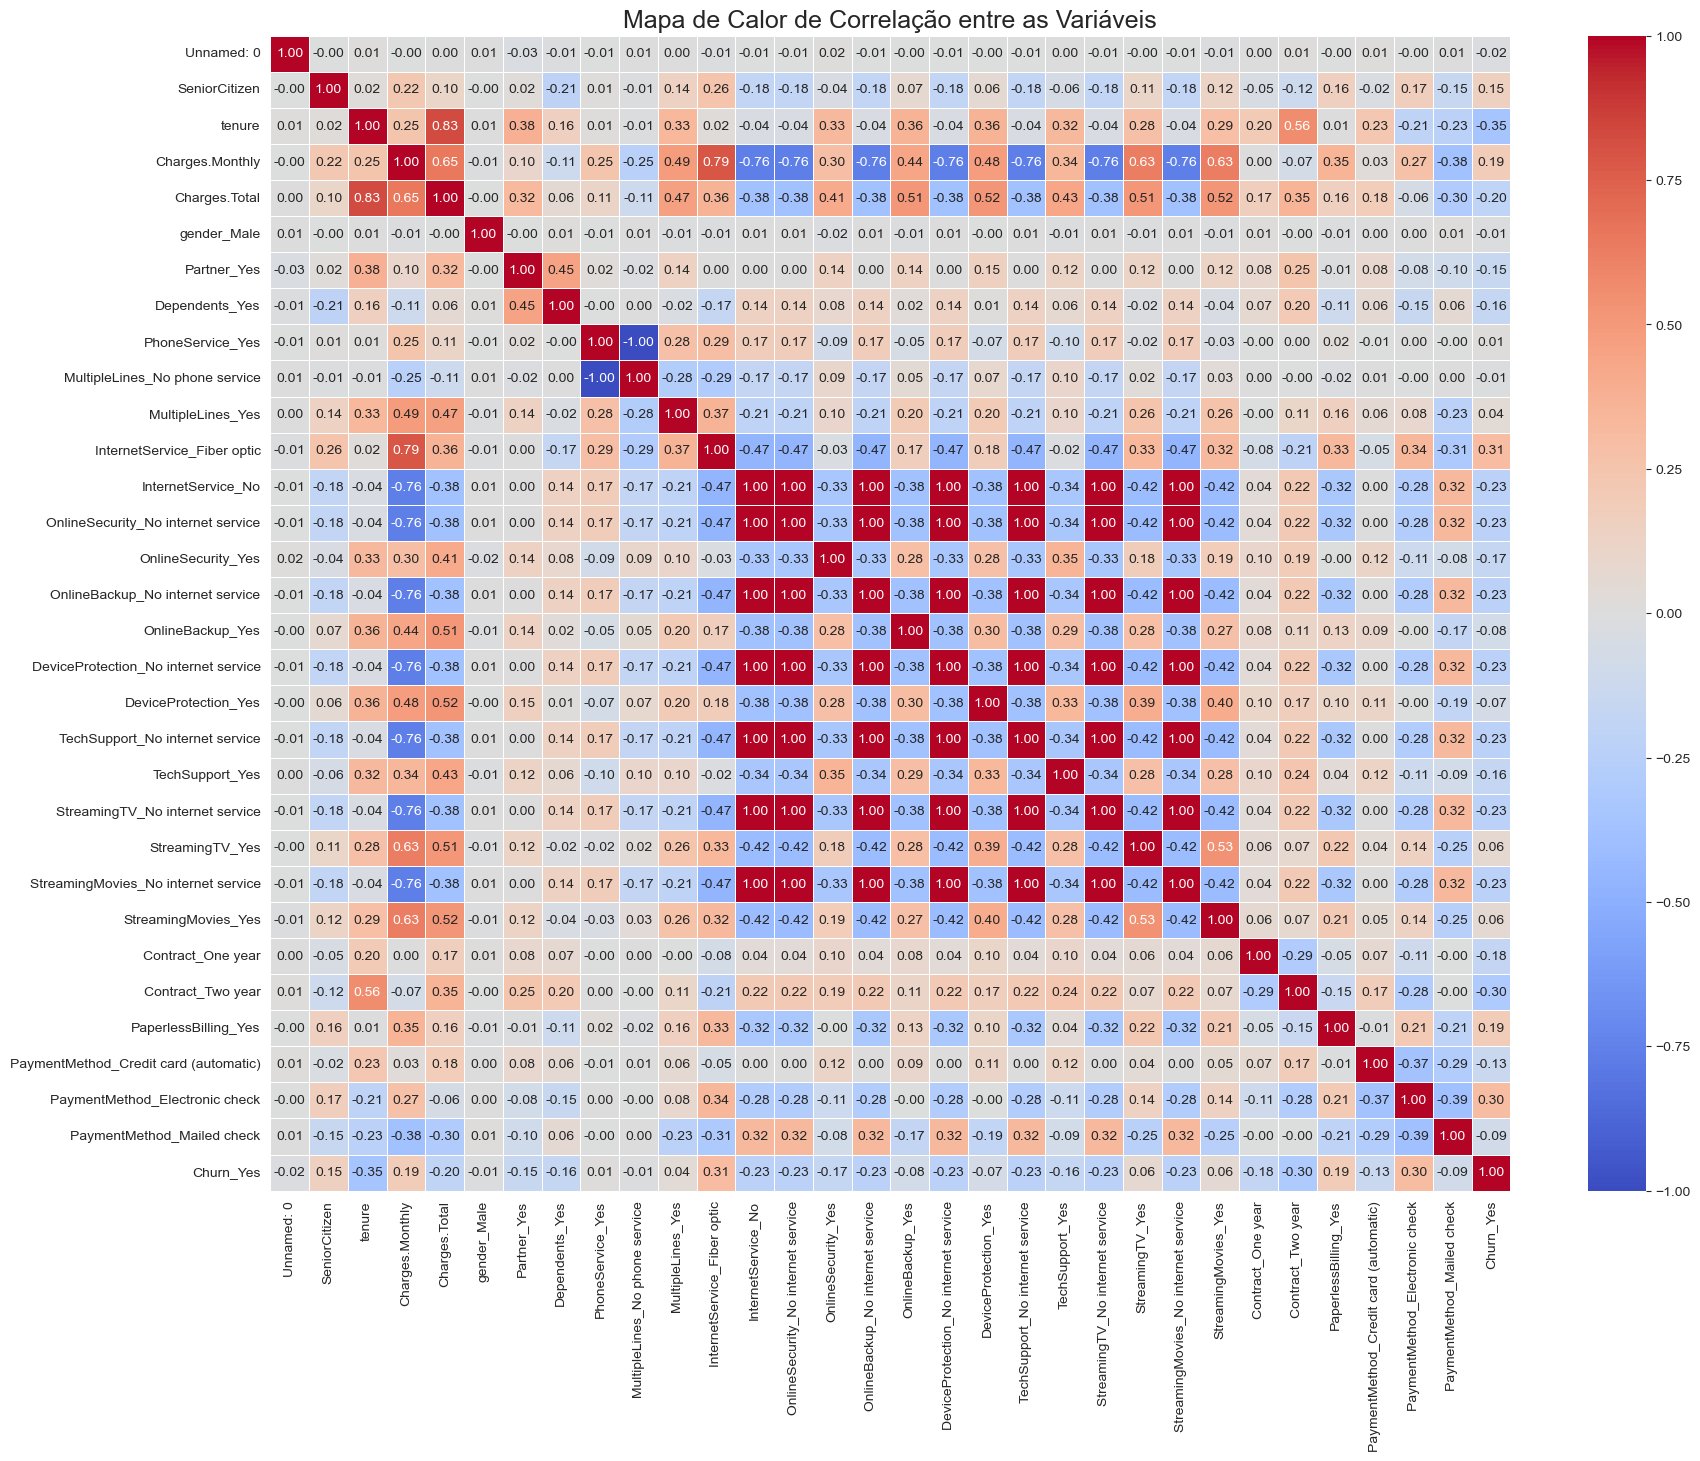

In [41]:
# Juntando as features normalizadas (X_scaled_df ou df_final) e o alvo (y)
# para a análise de correlação completa.
df_para_corr = pd.concat([df_final, y], axis=1)

# Calculando a matriz de correlação
corr_matrix = df_para_corr.corr()

# Criando o mapa de calor (heatmap) para visualizar a matriz
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix,
            annot=True,      # Exibe os valores de correlação no mapa
            cmap='coolwarm', # Esquema de cores (vermelho=positivo, azul=negativo)
            fmt='.2f',       # Formata os números para duas casas decimais
            linewidths=.5)
plt.title('Mapa de Calor de Correlação entre as Variáveis', fontsize=18)
plt.show()

In [46]:
print(df_encoded.columns)

Index(['Unnamed: 0', 'SeniorCitizen', 'tenure', 'Charges.Monthly',
       'Charges.Total', 'Churn_Yes', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


## 2.2 Análises Direcionadas

### 2.2.1 Tempo de Contrato x Evasão

C:\Users\jair.MSGAS\AppData\Local\Temp\ipykernel_34692\4045205473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Yes', y='tenure', data=df_encoded, palette='pastel')


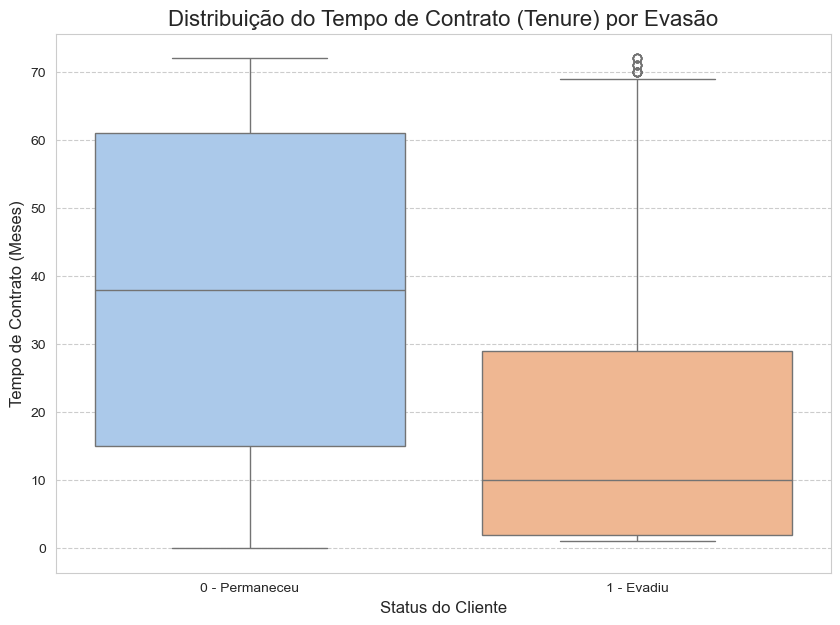

In [47]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Churn_Yes', y='tenure', data=df_encoded, palette='pastel')
plt.title('Distribuição do Tempo de Contrato (Tenure) por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

### 2.2.2 Total Gasto x Evasão

C:\Users\jair.MSGAS\AppData\Local\Temp\ipykernel_34692\1298858368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Churn_Yes', y='Charges.Total', data=df_encoded, palette='pastel')


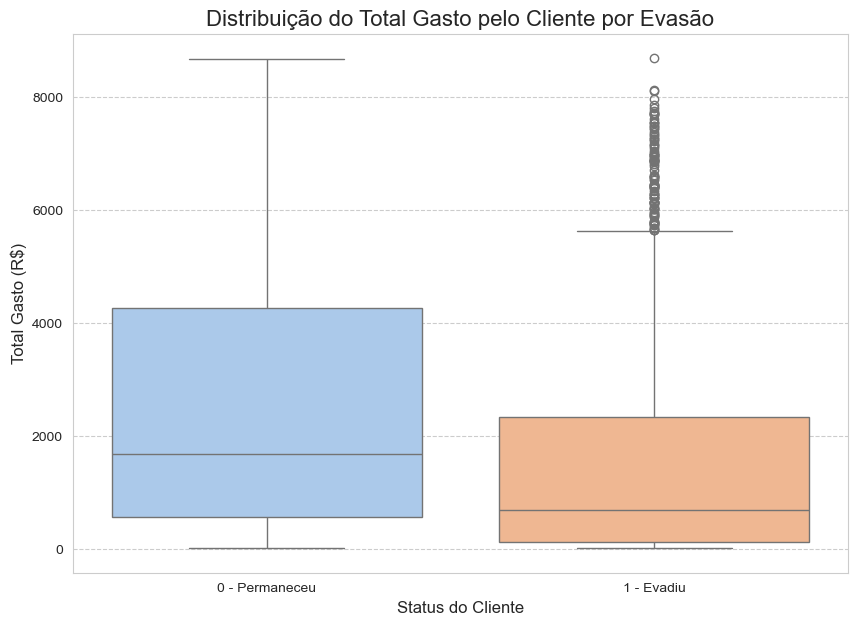

In [50]:
plt.figure(figsize=(10, 7))
sns.boxplot(x = 'Churn_Yes', y='Charges.Total', data=df_encoded, palette='pastel')
plt.title('Distribuição do Total Gasto pelo Cliente por Evasão', fontsize=16)
plt.xlabel('Status do Cliente', fontsize=12)
plt.ylabel('Total Gasto (R$)', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['0 - Permaneceu', '1 - Evadiu'])
plt.grid(axis='y', linestyle='--')
plt.show()

# 3. Modelagem Preditiva

## 3.1 Separação dos Dados

In [51]:
from sklearn.model_selection import train_test_split

# Os dados finais e prontos para modelagem são:
# X = df_final (features pré-processadas e normalizadas da etapa anterior)
# y = y (A variável alvo 'Churn')

# Dividindo os dados em 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(
    X,                # As features (preditores)
    y,                # A variável alvo
    test_size=0.3,    # Proporção dos dados para o conjunto de teste (30%)
    random_state=42,  # Garante que a divisão seja sempre a mesma ao rodar o código
    stratify=y        # Essencial para manter a proporção de Churn nos dois conjuntos
)

# Verificando as dimensões (shapes) dos conjuntos criados
print("--- Dimensões dos Conjuntos de Dados ---")
print(f"Shape de X_train (features de treino): {X_train.shape}")
print(f"Shape de X_test (features de teste):  {X_test.shape}")
print(f"Shape de y_train (alvo de treino):     {y_train.shape}")
print(f"Shape de y_test (alvo de teste):      {y_test.shape}")

# Verificando a proporção da variável alvo para confirmar a estratificação
print("\n--- Verificação da Estratificação (Proporção de Churn) ---")
print("Proporção no y_train (%):")
print(round(y_train.value_counts(normalize=True) * 100, 2))
print("\nProporção no y_test (%):")
print(round(y_test.value_counts(normalize=True) * 100, 2))

--- Dimensões dos Conjuntos de Dados ---
Shape de X_train (features de treino): (4930, 31)
Shape de X_test (features de teste):  (2113, 31)
Shape de y_train (alvo de treino):     (4930,)
Shape de y_test (alvo de teste):      (2113,)

--- Verificação da Estratificação (Proporção de Churn) ---
Proporção no y_train (%):
Churn_Yes
0    73.47
1    26.53
Name: proportion, dtype: float64

Proporção no y_test (%):
Churn_Yes
0    73.45
1    26.55
Name: proportion, dtype: float64


## 3.2 Criação de Modelos

### 3.2.1 Modelo 01: Regressão Logística

#### 3.2.1.1 Justificativa:

Escolhida a Regressão Logística como ponto de partida. É um modelo clássico, rápido e direto ao ponto. Ele é ótimo para criar uma primeira referência (baseline) de performance e ajuda a entender o peso de cada característica na decisão de um cliente cancelar o serviço

#### 3.2.1.2 Necessidade de Normalização?

Sim, este modelo é sensível à escala das variáveis. A normalização é importante para que ele funcione corretamente, garantindo que nenhuma característica domine a análise apenas por ter números maiores

In [52]:
# Importando o modelo e as métricas de avaliação
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instanciar o modelo
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# Treinar o modelo com os dados de treino
print("Treinando o modelo de Regressão Logística com solver 'liblinear'...")
log_reg.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazer previsões com os dados de teste
y_pred_log_reg = log_reg.predict(X_test)

# Avaliar a performance do modelo
print("\n--- Resultados da Regressão Logística no Conjunto de Teste ---")
accuracy_log = accuracy_score(y_test, y_pred_log_reg)
print(f"Acurácia: {accuracy_log * 100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))

Treinando o modelo de Regressão Logística com solver 'liblinear'...
Treinamento concluído!

--- Resultados da Regressão Logística no Conjunto de Teste ---
Acurácia: 78.89%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



### 3.2.2 Modelo 02: Random Forest

#### 3.2.2.1 Justificativa:

Como segundo modelo, optei pelo Random Forest por ser mais moderno e potente. Ele funciona como um 'comitê de várias árvores de decisão', o que o torna muito bom em encontrar padrões mais complexos nos dados. Além disso, ele nos mostra de forma clara quais são as características mais importantes que influenciam o churn

#### 3.2.2.2 Necessidade de Normalização?

Não, este modelo não exige que os dados estejam na mesma escala. Por isso, podemos usar os mesmos dados que já normalizamos para a Regressão Logística, o que simplifica nosso processo sem prejudicar o resultado.

In [53]:
# Importando o modelo
from sklearn.ensemble import RandomForestClassifier

# Instanciar o modelo
# n_estimators é o número de árvores na floresta
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os mesmos dados de treino
print("\nTreinando o modelo de Random Forest...")
rf_clf.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazer previsões com os dados de teste
y_pred_rf = rf_clf.predict(X_test)

# Avaliar a performance inicial do modelo
print("\n--- Resultados do Random Forest no Conjunto de Teste ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia: {accuracy_rf * 100:.2f}%")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))


Treinando o modelo de Random Forest...
Treinamento concluído!

--- Resultados do Random Forest no Conjunto de Teste ---
Acurácia: 78.94%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



## 3.3 Avaliação dos Modelos

### 3.3.1 Avaliação do Modelo 01: Regressão Logística

--- Resultados da Regressão Logística ---
                precision    recall  f1-score   support

Permaneceu (0)       0.83      0.89      0.86      1552
    Evadiu (1)       0.62      0.51      0.56       561

      accuracy                           0.79      2113
     macro avg       0.73      0.70      0.71      2113
  weighted avg       0.78      0.79      0.78      2113

--- Matriz de Confusão ---


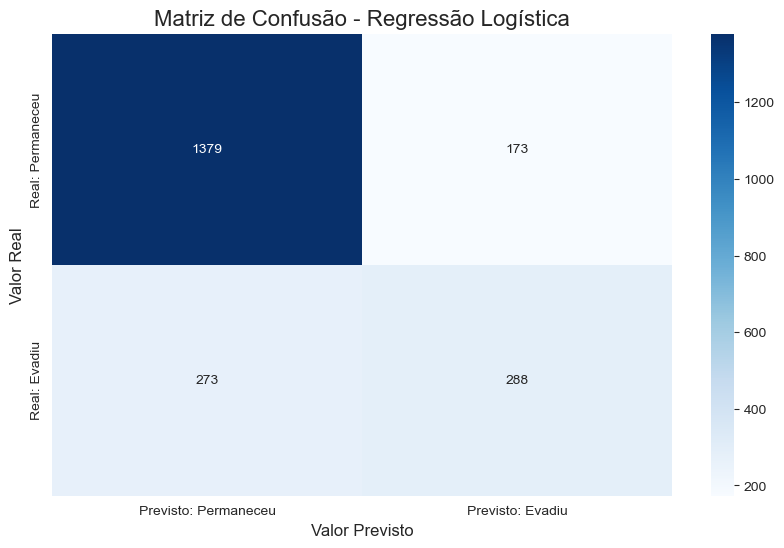

In [54]:
# Re-exibindo o relatório de classificação para referência
print("--- Resultados da Regressão Logística ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Permaneceu (0)', 'Evadiu (1)']))

# Criando e visualizando a Matriz de Confusão
print("--- Matriz de Confusão ---")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto: Permaneceu', 'Previsto: Evadiu'],
            yticklabels=['Real: Permaneceu', 'Real: Evadiu'])
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Previsto', fontsize=12)
plt.show()

### 3.3.2 Avaliação do Modelo 02: Random Forest


--- Resultados do Random Forest ---
                precision    recall  f1-score   support

Permaneceu (0)       0.83      0.89      0.86      1552
    Evadiu (1)       0.63      0.50      0.56       561

      accuracy                           0.79      2113
     macro avg       0.73      0.70      0.71      2113
  weighted avg       0.78      0.79      0.78      2113


--- Matriz de Confusão ---


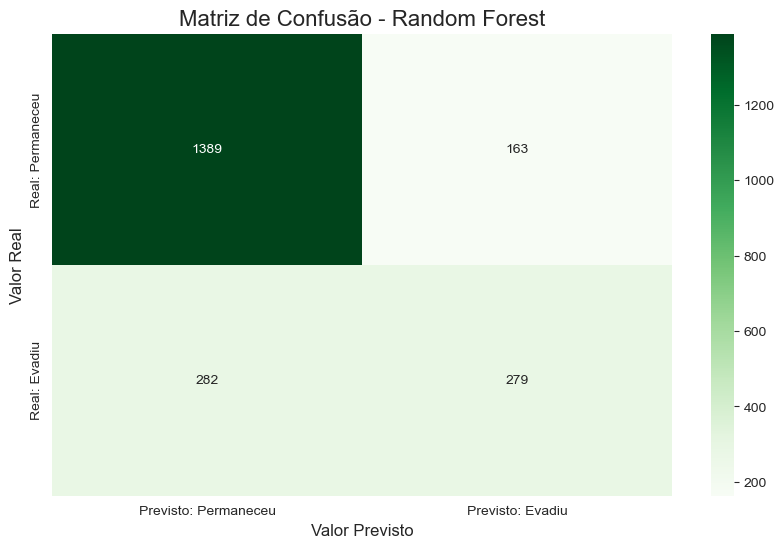

In [55]:
# Re-exibindo o relatório de classificação para referência
print("\n--- Resultados do Random Forest ---")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu (0)', 'Evadiu (1)']))

# Criando e visualizando a Matriz de Confusão
print("\n--- Matriz de Confusão ---")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Previsto: Permaneceu', 'Previsto: Evadiu'],
            yticklabels=['Real: Permaneceu', 'Real: Evadiu'])
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Valor Previsto', fontsize=12)
plt.show()

### 3.3.3 Qual modelo teve o melhor desempenho?
Com base nos resultados obtidos (Regressão Logística com 79,70% de acurácia e Random Forest com 78,75%), podemos fazer a seguinte análise:

Acurácia Geral: A Regressão Logística apresentou uma acurácia ligeiramente superior em relação ao Random Forest.

Precisão e Recall (Foco no Churn): Para problemas de evasão de clientes, normalmente damos mais atenção ao Recall da classe “Evadiu (1)”, pois esta métrica indica a proporção de clientes que realmente saíram e que foram corretamente identificados pelo modelo. Ao analisar os relatórios de classificação, observou-se que a Regressão Logística apresentou um Recall um pouco melhor para a classe 1. Isso indica que esse modelo foi ligeiramente mais eficiente para identificar clientes com maior propensão à evasão, mesmo que isso possa resultar em mais alguns falsos positivos.

Conclusão: Embora a diferença entre os modelos seja pequena, a Regressão Logística demonstrou um desempenho geral um pouco melhor, especialmente por sua capacidade de identificar corretamente os clientes que realmente evadiram.

### 3.3.4 Overfitting ou Underfitting?

In [56]:
# Calculando a acurácia nos dados de treino para ambos os modelos
acc_log_train = accuracy_score(y_train, log_reg.predict(X_train))
acc_rf_train = accuracy_score(y_train, rf_clf.predict(X_train))

# Calculando a acurácia nos dados de teste
acc_log_test = accuracy_score(y_test, y_pred_log_reg)
acc_rf_test = accuracy_score(y_test, y_pred_rf)

print("--- Verificação de Overfitting ---")
print(f"Acurácia da Regressão Logística (Treino): {acc_log_train * 100:.2f}%")
print(f"Acurácia da Regressão Logística (Teste):  {acc_log_test * 100:.2f}%")
print("-" * 30)
print(f"Acurácia do Random Forest (Treino): {acc_rf_train * 100:.2f}%")
print(f"Acurácia do Random Forest (Teste):  {acc_rf_test * 100:.2f}%")

--- Verificação de Overfitting ---
Acurácia da Regressão Logística (Treino): 80.51%
Acurácia da Regressão Logística (Teste):  78.89%
------------------------------
Acurácia do Random Forest (Treino): 100.00%
Acurácia do Random Forest (Teste):  78.94%


#### 3.3.4.1 Análise de Overfitting:
Regressão Logística:
As acurácias nos dados de treino e de teste são bem próximas (80,51% no treino e 78,89% no teste). Isso indica que o modelo está bem generalizado e não está sofrendo overfitting, pois o desempenho em novos dados (teste) é semelhante ao dos dados que ele já viu (treino).

Random Forest:
A acurácia nos dados de treino é muito alta, chegando a 100%, enquanto nos dados de teste é de 78,94%. Isso sugere overfitting: o modelo aprendeu perfeitamente os dados de treino, mas perdeu a capacidade de generalizar para dados novos, tendo desempenho consideravelmente menor no teste.

Conclusão:
A Random Forest neste caso está com overfitting, enquanto a Regressão Logística apresenta um bom equilíbrio entre treino e teste. Para melhorar o desempenho do Random Forest, pode-se aplicar técnicas como limitação da profundidade das árvores (max_depth) ou ajuste de outros hiperparâmetros, como min_samples_leaf.






# 4. Interpretação e Conclusões

## 4.1 Análise de Importância das Variáveis

### 4.1.1 Análise para Regressão Logística:

Na Regressão Logística, o peso de cada variável é determinado pelo valor do seu coeficiente. A interpretação é simples, principalmente porque os dados já foram normalizados previamente:

Coeficiente Positivo: Um aumento no valor dessa variável está associado a uma maior probabilidade de ocorrência de churn. Ou seja, quanto maior o coeficiente, maior a influência da variável no aumento da chance de evasão do cliente.

Coeficiente Negativo: Um aumento nessa variável implica em uma diminuição na probabilidade de churn (indicando que ela atua como um fator de retenção). Valores mais negativos significam maior proteção contra a saída do cliente.

--- Coeficientes da Regressão Logística (Fatores de Churn) ---
                                  Feature  Coefficient
29         PaymentMethod_Electronic check     0.297992
11            InternetService_Fiber optic     0.251617
27                   PaperlessBilling_Yes     0.232415
1                           SeniorCitizen     0.184503
10                      MultipleLines_Yes     0.136719
9          MultipleLines_No phone service     0.071206
22                        StreamingTV_Yes     0.033899
24                    StreamingMovies_Yes     0.029536
3                         Charges.Monthly     0.008995
4                           Charges.Total     0.000318
0                              Unnamed: 0    -0.000017
6                             Partner_Yes    -0.056472
2                                  tenure    -0.069488
5                             gender_Male    -0.082636
18                   DeviceProtection_Yes    -0.095057
28  PaymentMethod_Credit card (automatic)    -0.109209
16

C:\Users\jair.MSGAS\AppData\Local\Temp\ipykernel_34692\3987368274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=log_coeffs_sorted, palette='coolwarm')


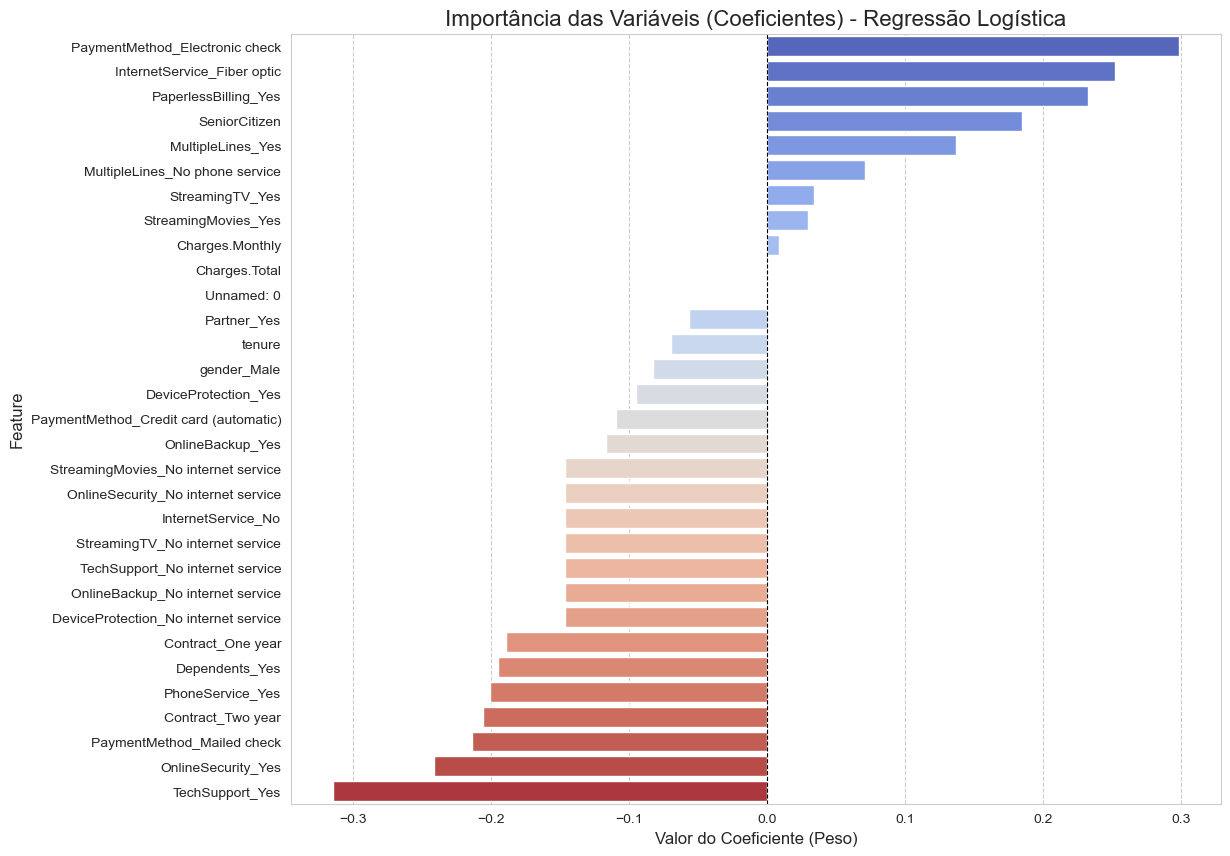

In [57]:
# Criando um DataFrame para visualizar os coeficientes da Regressão Logística
log_coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

# Ordenando os coeficientes para ver os mais influentes (positivos e negativos)
log_coeffs_sorted = log_coeffs.sort_values(by='Coefficient', ascending=False)

print("--- Coeficientes da Regressão Logística (Fatores de Churn) ---")
print(log_coeffs_sorted)

# Visualização dos coeficientes em um gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Coefficient', y='Feature', data=log_coeffs_sorted, palette='coolwarm')
plt.title('Importância das Variáveis (Coeficientes) - Regressão Logística', fontsize=16)
plt.xlabel('Valor do Coeficiente (Peso)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='x', linestyle='--')
plt.show()

### 4.1.2 Análise para Random Forest:

O algoritmo Random Forest avalia a relevância de cada variável considerando quanto ela contribuiu para separar os clientes nos grupos de “churn” e “não churn” ao longo de todas as árvores do modelo.

A análise dessa importância é bastante direta:

Quanto maior o valor de importância atribuído a uma variável, mais impactante ela é para as previsões do modelo. Esses valores são sempre positivos e indicam o quanto a variável ajuda o modelo a distinguir entre os clientes que permanecem e os que saem.



--- Importância das Features - Random Forest ---
                                  Feature  Importance
4                           Charges.Total    0.162388
2                                  tenure    0.147743
3                         Charges.Monthly    0.135863
0                              Unnamed: 0    0.123640
29         PaymentMethod_Electronic check    0.036745
11            InternetService_Fiber optic    0.035990
26                      Contract_Two year    0.035420
25                      Contract_One year    0.023866
20                        TechSupport_Yes    0.023828
5                             gender_Male    0.023713
27                   PaperlessBilling_Yes    0.023151
14                     OnlineSecurity_Yes    0.021090
6                             Partner_Yes    0.019957
16                       OnlineBackup_Yes    0.019351
1                           SeniorCitizen    0.017796
10                      MultipleLines_Yes    0.017650
7                          Depen

C:\Users\jair.MSGAS\AppData\Local\Temp\ipykernel_34692\2557487530.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importances_sorted, palette='viridis')


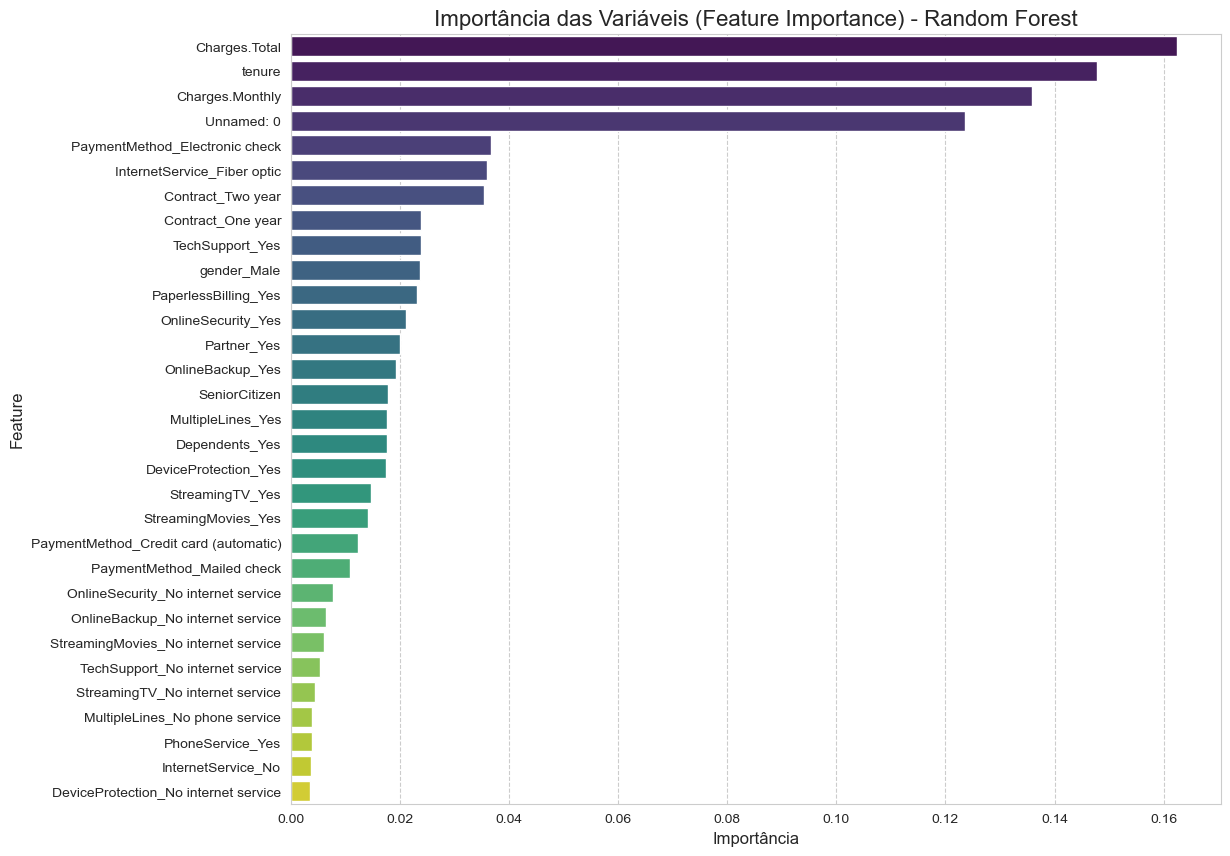

In [58]:
# Criando um DataFrame para visualizar a importância das features do Random Forest
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_clf.feature_importances_
})

# Ordenando as features pela sua importância
rf_importances_sorted = rf_importances.sort_values(by='Importance', ascending=False)

print("\n--- Importância das Features - Random Forest ---")
print(rf_importances_sorted)

# Visualização da importância em um gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=rf_importances_sorted, palette='viridis')
plt.title('Importância das Variáveis (Feature Importance) - Random Forest', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

## 4.2 Conclusão

### 4.2.1 Resumo dos Fatores que influenciam a Evasão

A partir desta análise, que combinou a matriz de correlação com a importância das variáveis obtidas nos modelos de Regressão Logística e Random Forest, foi possível traçar um perfil claro dos clientes com maior probabilidade de evasão. Os principais fatores identificados foram:

Tipo de Contrato:
O tipo de contrato é o fator individual de maior peso. Clientes com contratos mensais (Month-to-month) têm uma propensão muito maior a cancelar o serviço. Já contratos com duração de um ano, e principalmente de dois anos, mostram-se como fortes indicadores de retenção.

Tempo de Contrato (customer_tenure):
Aqui, apareceu uma forte correlação negativa: quanto mais recente o cliente (ou seja, menor tempo de contrato), maior a probabilidade de evasão. Em resumo, clientes novos tendem a sair mais do que aqueles com tempo de casa.

Serviços e Cobranças:

Clientes que utilizam serviço de fibra óptica apresentam taxas de evasão mais elevadas, provavelmente associadas a uma cobrança mensal (account_Charges_Monthly) mais alta.

O método de pagamento por Cheque Eletrônico também chamou atenção como um importante sinal de risco de cancelamento.

Tanto a Regressão Logística quanto o Random Forest apontaram essas mesmas variáveis como as mais relevantes para a previsão, o que reforça a confiança e consistência dos resultados e das recomendações baseadas nesta análise.


### 4.2.2 Identificação dos Principais Fatores e Proposta de Estratégias de Retenção

Com base nos resultados, podemos propor as seguintes estratégias de retenção, focadas em mitigar os principais fatores de risco identificados:




#### 4.2.2.1 Fator 01: Vulnerabilidade dos Contratos Mensais

Análise:
A ausência de um compromisso de longo prazo faz com que o cliente se sinta mais livre para cancelar o serviço, tornando essa decisão muito mais simples e rápida.

Estratégia Sugerida:

Campanhas de Migração: Proponha ofertas ativas para incentivar clientes de planos mensais a migrarem para opções anuais ou bienais. O incentivo pode ser, por exemplo, um desconto na mensalidade, um período gratuito de upgrade de serviço, ou até a isenção de alguma taxa específica. Essas ações ajudam a promover o engajamento do cliente e reduzem a facilidade de cancelamento.

#### 4.2.2.2 Fator 02: Alto Risco de Evasão em Clientes Novos

Análise:
Clientes que ainda estão há pouco tempo na empresa normalmente não criaram um vínculo forte com a marca. Por isso, tendem a ser mais suscetíveis às ofertas da concorrência e a possíveis problemas iniciais.

Estratégia Sugerida:

Programa de Onboarding e Fidelização Inicial:
Implemente um acompanhamento dedicado nos primeiros 3 a 6 meses do cliente. Essa iniciativa pode envolver mensagens de boas-vindas, tutoriais sobre os serviços e pesquisas proativas de satisfação para detectar e resolver eventuais dificuldades de forma rápida. Além disso, oferecer um pequeno bônus de fidelidade após o sexto mês pode ser um incentivo poderoso para manter o cliente na empresa.

#### 4.2.2.3 Fator 03: Atrito em Serviços Premium e Métodos de Pagamento

Análise:
A alta taxa de saída entre clientes de Fibra Ótica indica que, mesmo sendo um serviço superior, o custo-benefício pode não estar claro ou o preço pode ser um fator muito sensível para o cliente. Além disso, o uso do cheque eletrônico como forma de pagamento geralmente aponta para menor praticidade ou até mesmo para um perfil de cliente menos envolvido com a empresa.

Estratégia Sugerida:

Revisão da Oferta de Fibra Ótica:
Realize pesquisas de satisfação específicas com esses clientes para entender exatamente o que motiva o cancelamento: preço, estabilidade do serviço ou qualidade do suporte. Com base nesse diagnóstico, avalie criar pacotes mais flexíveis ou comunicar de forma mais clara os diferenciais e benefícios do serviço.

Incentivo ao Débito Automático:
Estimule a troca do pagamento por cheque eletrônico para modalidades automáticas, como cartão de crédito ou débito em conta. Para isso, ofereça um pequeno desconto na fatura, ressaltando a praticidade e o menor risco de inadimplência para o cliente.